In [1]:
import numpy as np
from bokeh.plotting import figure, show 
from bokeh.io import output_notebook

# Plots inline 
output_notebook()

Loading BokehJS ...

In [2]:
N = 4000                                    # Number of points
x = np.random.random(size = N) * 100        # X random variable
y = np.random.random(size = N) * 100        # Y random variable
radii = np.random.random(size = N) * 1.5    # Random size for scatterplot

colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x).astype(int), np.floor(30+2*y).astype(int))]

p = figure()
p.circle(x, y, radius = radii, fill_color = colors, fill_alpha = 0.6, line_color = None)
show(p)

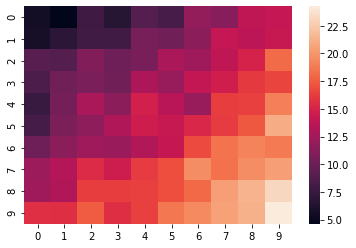

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# 10x10 heatmap of random data
side_length = 10

# Random matrix w values around 5
data = 5 + np.random.randn(side_length, side_length)

# Make larger values as you go towards 9
data += np.arange(side_length)
data += np.reshape(np.arange(side_length), (side_length, 1))

# Make heatmap
sns.heatmap(data)
plt.show()

In [4]:
import pandas as pd 

df1 = pd.read_stata('https://github.com/QuantEcon/lecture-python/blob/master/source/_static/lecture_specific/ols/maketable1.dta?raw=true')
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
p = figure()
p.circle(x = 'avexpr', y = 'logpgp95', source = df1, size = 10, fill_alpha = 0.6, line_color = None)
p.title.text = 'Relationship between Expropriation risk and Income'
p.xaxis.axis_label = 'Average Expropriation Risk 1985-95'
p.yaxis.axis_label = 'Log of GDP per capita, PPP, 1995'
show(p)

In [6]:
# Dropping NA's is required to use numpy's polyfit
df1_subset = df1.dropna(subset=['logpgp95', 'avexpr'])

# Use only 'base sample' for plotting purposes
df1_subset = df1_subset[df1_subset['baseco'] == 1]

X = df1_subset['avexpr']
y = df1_subset['logpgp95']
labels = df1_subset['shortnam']

ols_line = np.poly1d(np.polyfit(X, y, 1))(np.unique(X))

In [7]:
p = figure()
p.circle(x = 'avexpr', y = 'logpgp95', source = df1, size = 10, fill_alpha = 0.6, line_color = None)
p.line(x = np.unique(X), y = ols_line, color = 'black', line_width = 2)
p.title.text = 'OLS Relationship between Expropriation risk and Income'
p.xaxis.axis_label = 'Average Expropriation Risk 1985-95'
p.yaxis.axis_label = 'Log of GDP per capita, PPP, 1995'
show(p)